Hitung Entropy dan Gain serta tentukan DCT

In [57]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from math import log2

In [58]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [59]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(data)

In [60]:
# Calculate entropy
def entropy(probs):
    return sum([-p * log2(p) for p in probs if p > 0])

In [61]:
# Calculate entropy of the dataset
def entropy_of_dataset(df, target):
    values = df[target].value_counts(normalize=True)
    return entropy(values)

In [62]:
# Calculate information gain
def information_gain(df, target, attribute):
    total_entropy = entropy_of_dataset(df, target)
    values = df[attribute].value_counts(normalize=True)
    weighted_entropy = sum([values[v] * entropy_of_dataset(df[df[attribute] == v], target) for v in values.index])
    return total_entropy - weighted_entropy

In [63]:
# Calculate information gain for each attribute
target = 'Play'
attributes = ['Outlook', 'Temperature', 'Humidity', 'Windy']
info_gains = {attr: information_gain(df, target, attr) for attr in attributes}

In [64]:
# Display information gains
print("Information Gain for each attribute:")
for attr, gain in info_gains.items():
    print(f"{attr}: {gain:.4f}")

Information Gain for each attribute:
Outlook: 0.2467
Temperature: 0.0292
Humidity: 0.1518
Windy: 0.0481


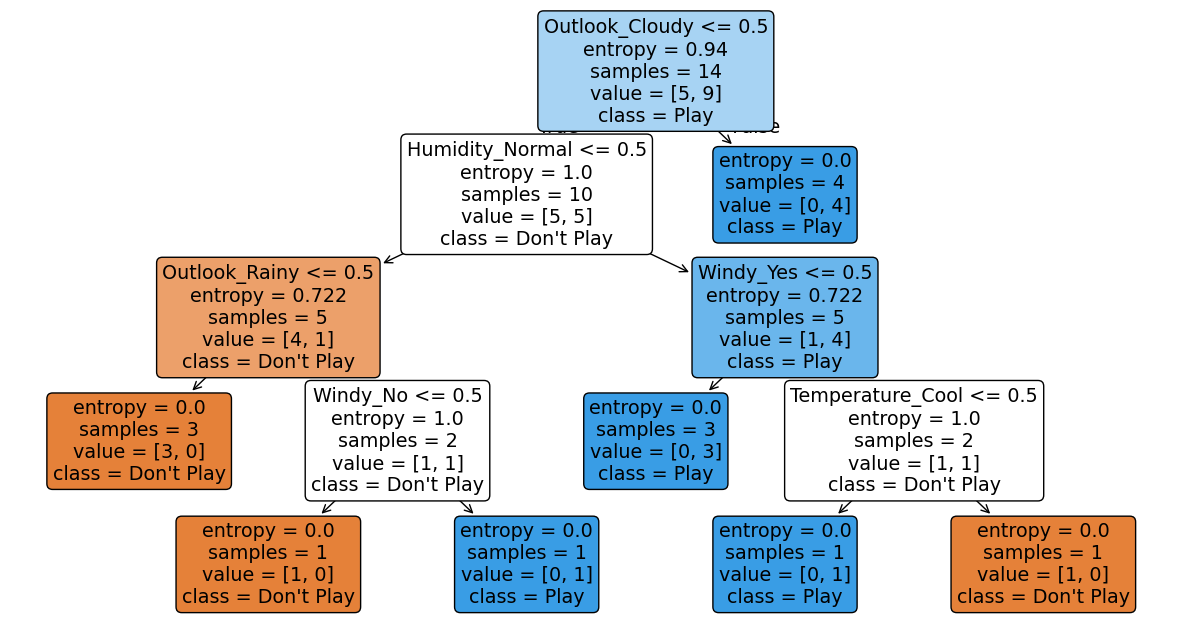

In [65]:
# Build and visualize the decision tree using scikit-learn
# Encode categorical data
df_encoded = pd.get_dummies(df.drop(columns=target))
y = df[target].apply(lambda x: 1 if x == 'Yes' else 0)  # Encode 'Yes' as 1 and 'No' as 0

# Train the decision tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(df_encoded, y)

# Plot the decision tree
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=df_encoded.columns, class_names=['Don\'t Play', 'Play'], filled=True, rounded=True)
plt.show()